In [ ]:
# ========================================
# 1. Import Libraries
# ========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

sns.set_theme(style='whitegrid')


In [ ]:
# ========================================
# 2. Load Dataset
# ========================================
df = pd.read_csv('./dataset/student/student-por.csv', sep=';')
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]


In [3]:
df.shape

(649, 33)

In [ ]:


# ========================================
# 3. Exploratory Data Analysis (EDA)
# ========================================
print("\nDataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())





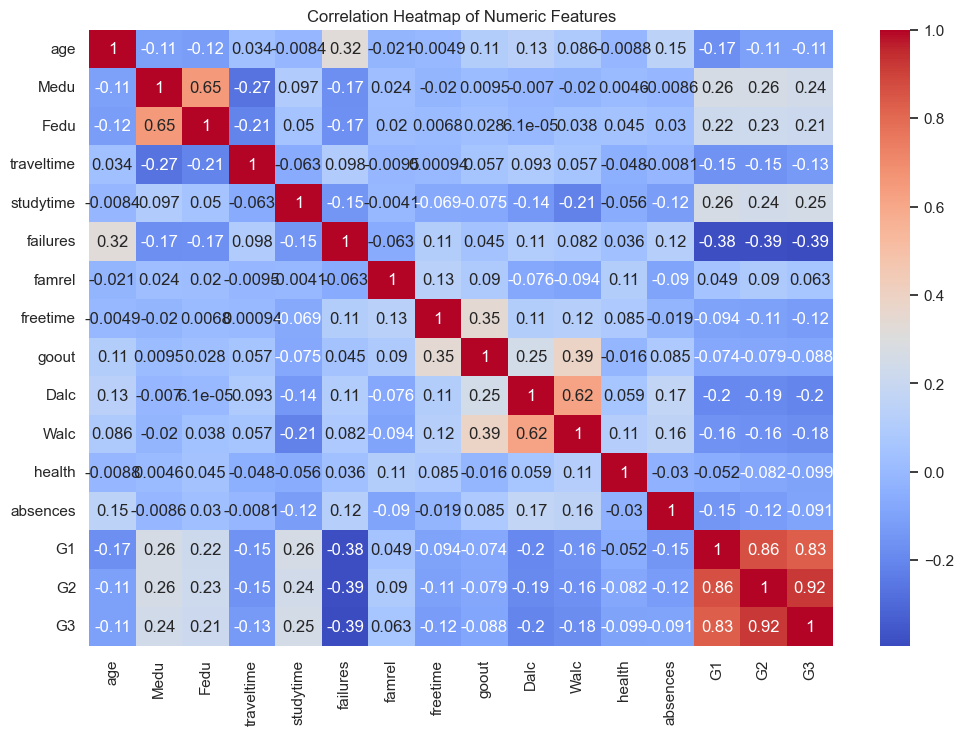

In [5]:
# Correlation matrix (numeric only)
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Features")
plt.show()

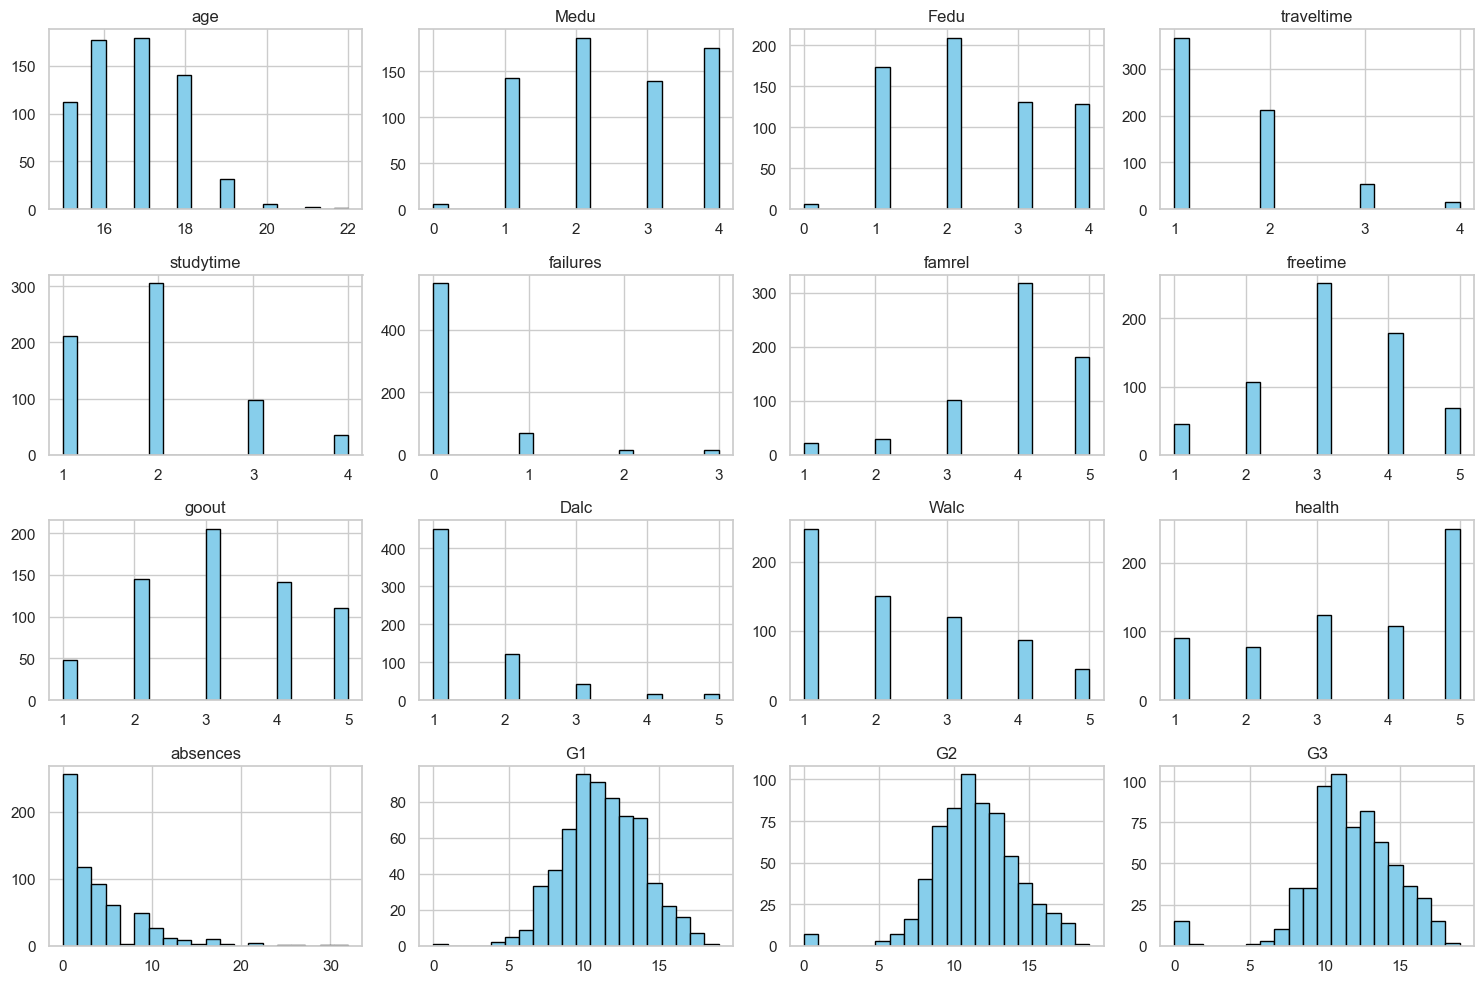

In [6]:
# Histogram for numeric features
df.select_dtypes(include=['int64', 'float64']).hist(bins=20, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.tight_layout()
plt.show()


In [23]:


# ========================================
# 4. Preprocessing
# ========================================
# Target variable
target = 'G3'

# Features
X = df.drop(columns=[target])
y = df[target]

# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Preprocessing pipelines
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(drop='first', sparse=False), categorical_cols)
])



In [24]:

# ========================================
# 5. Train/Test Split
# ========================================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [25]:

# ========================================
# 6. Model Training
# ========================================
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)



d:\2system_programming\python_programming\machine learning\.venv383\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health', 'absences',
                                                   'G1', 'G2']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('regressor', LinearRegression())])


Model Evaluation:
Root Mean Squared Error (RMSE): 1.21
Mean Absolute Error (MAE): 0.77
R² Score: 0.85


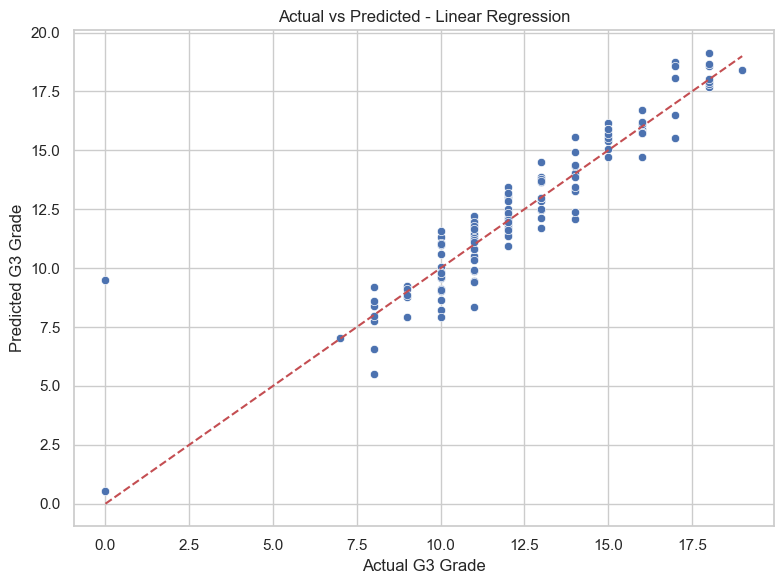

In [26]:


# ========================================
# 7. Prediction & Evaluation
# ========================================
y_pred = pipeline.predict(X_test)

# Evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

# Residual plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual G3 Grade")
plt.ylabel("Predicted G3 Grade")
plt.title("Actual vs Predicted - Linear Regression")
plt.plot([y.min(), y.max()], [y.min(), y.max()], "r--")
plt.tight_layout()
plt.show()

In [28]:

# ========================================
# 8. Conclusion
# ========================================
print("\nConclusion:")
print("This model attempts to predict students' final grades (G3) using demographic and academic-related features.")
print("Linear Regression provides a baseline performance. You may improve results using more advanced models like Random Forest or Gradient Boosting.")
print("Further tuning and cross-validation can help in improving accuracy and generalization.")


Conclusion:
This model attempts to predict students' final grades (G3) using demographic and academic-related features.
Linear Regression provides a baseline performance. You may improve results using more advanced models like Random Forest or Gradient Boosting.
Further tuning and cross-validation can help in improving accuracy and generalization.


In [7]:
!jupyter nbconvert --to python student.ipynb --TemplateExporter.exclude_input_prompt=True


[NbConvertApp] Converting notebook student.ipynb to python
[NbConvertApp] Writing 3880 bytes to student.py
